In [1]:
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import tree
import pandas as pd
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
jazz = nx.read_gml( 'jazz.gml', label = None)

In [ ]:
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow',
    6 : 'red'
}

In [22]:
#function to plot posicions
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=9.0,

                        # Log
                        verbose=True)

100%|██████████| 2000/2000 [00:02<00:00, 804.75it/s]


BarnesHut Approximation  took  0.73  seconds
Repulsion forces  took  1.27  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.16  seconds


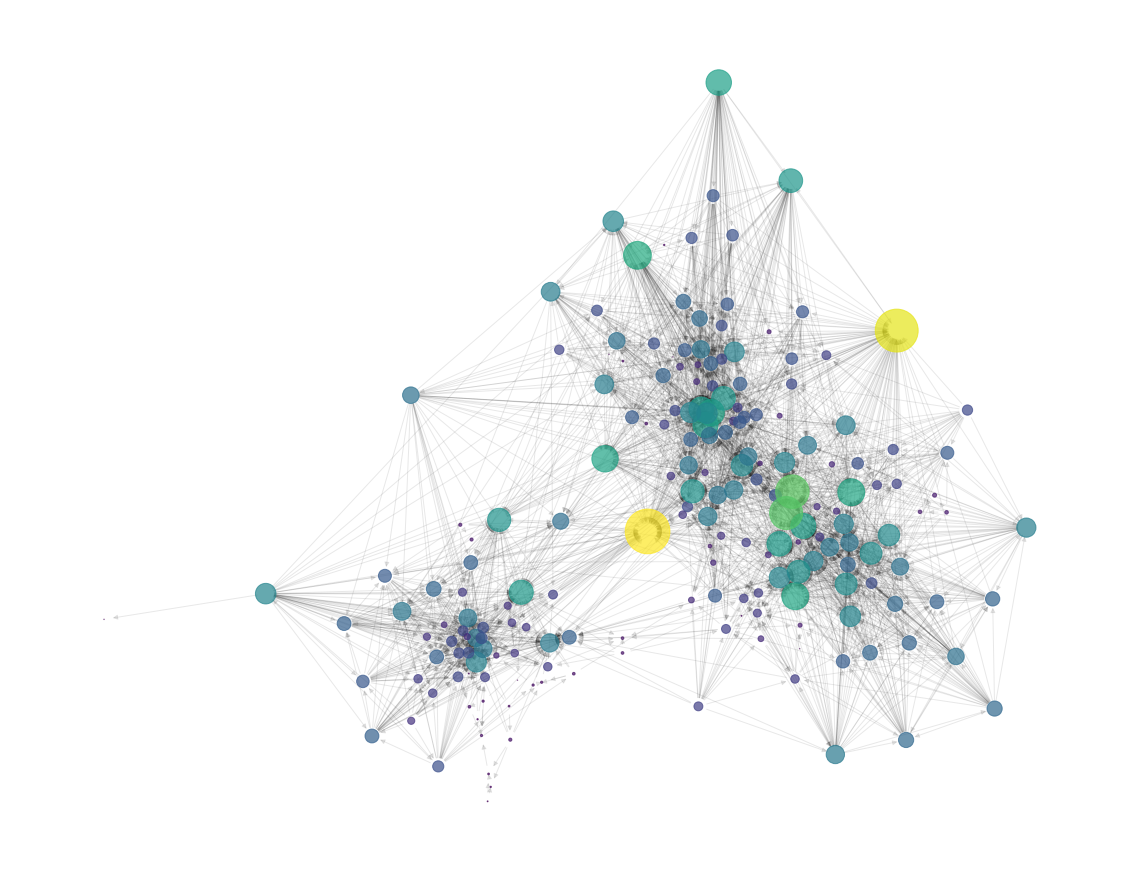

In [43]:

degree = dict(jazz.degree)
plt.figure(figsize=(20,16))

size_node =  [(v ** 2)/5 for v in degree.values()]
color_node =  [v for v in degree.values()]

positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()





100%|██████████| 2000/2000 [00:02<00:00, 690.38it/s]


BarnesHut Approximation  took  0.82  seconds
Repulsion forces  took  1.52  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.16  seconds
AdjustSpeedAndApplyForces step  took  0.18  seconds


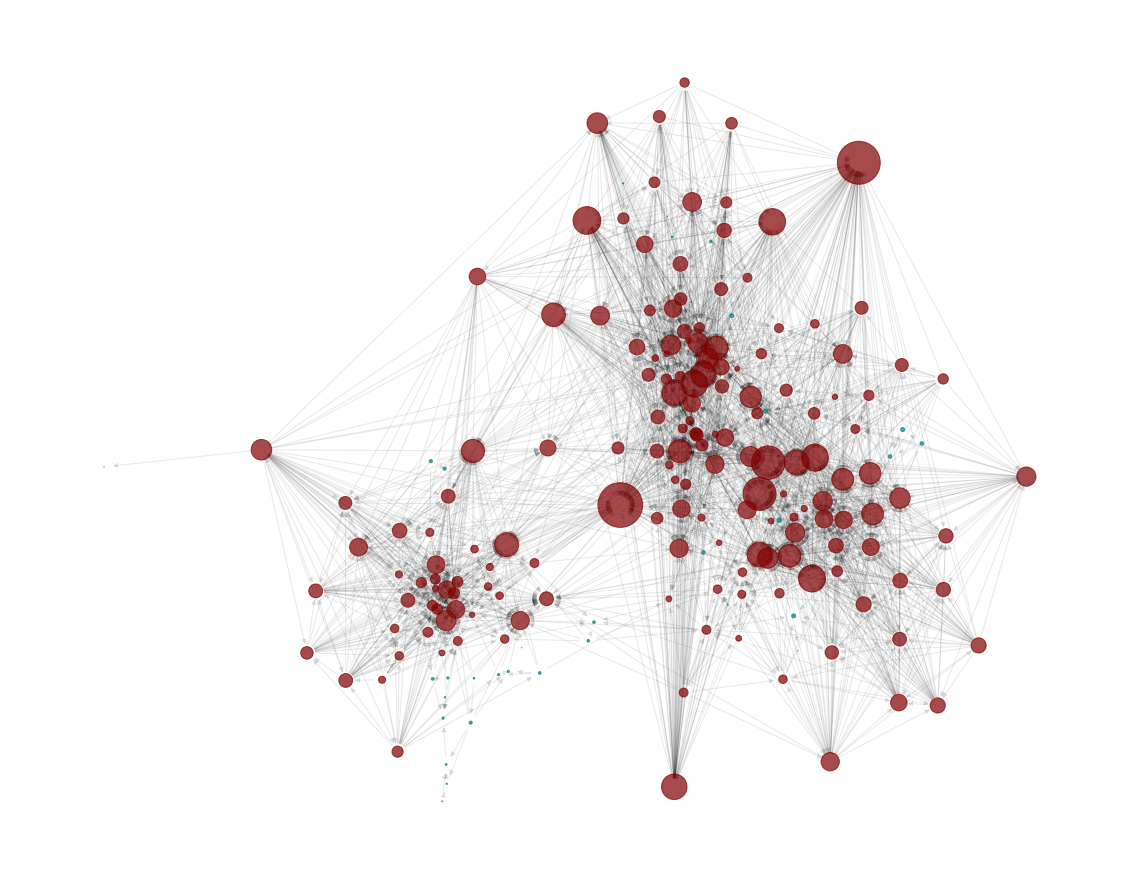

In [203]:


degree = dict(jazz.degree)
plt.figure(figsize=(20,16))


size_node =  [(v ** 2)/5 for v in degree.values()]
color_node =  [cmap[0] if v > 10 else cmap[1] for v in degree.values()]



positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()


In [49]:
#coloring by counities modularidad
#readou s
#perimetter
#strongly connnected
#density

In [62]:
from networkx.algorithms import community
G = nx.barbell_graph(5, 1)
communities_generator = community.girvan_newman(jazz)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
jazz_communities =sorted(map(sorted, next_level_communities))


In [109]:
len(jazz_communities)

3

100%|██████████| 2000/2000 [00:02<00:00, 818.76it/s]


BarnesHut Approximation  took  0.73  seconds
Repulsion forces  took  1.27  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.11  seconds
AdjustSpeedAndApplyForces step  took  0.16  seconds


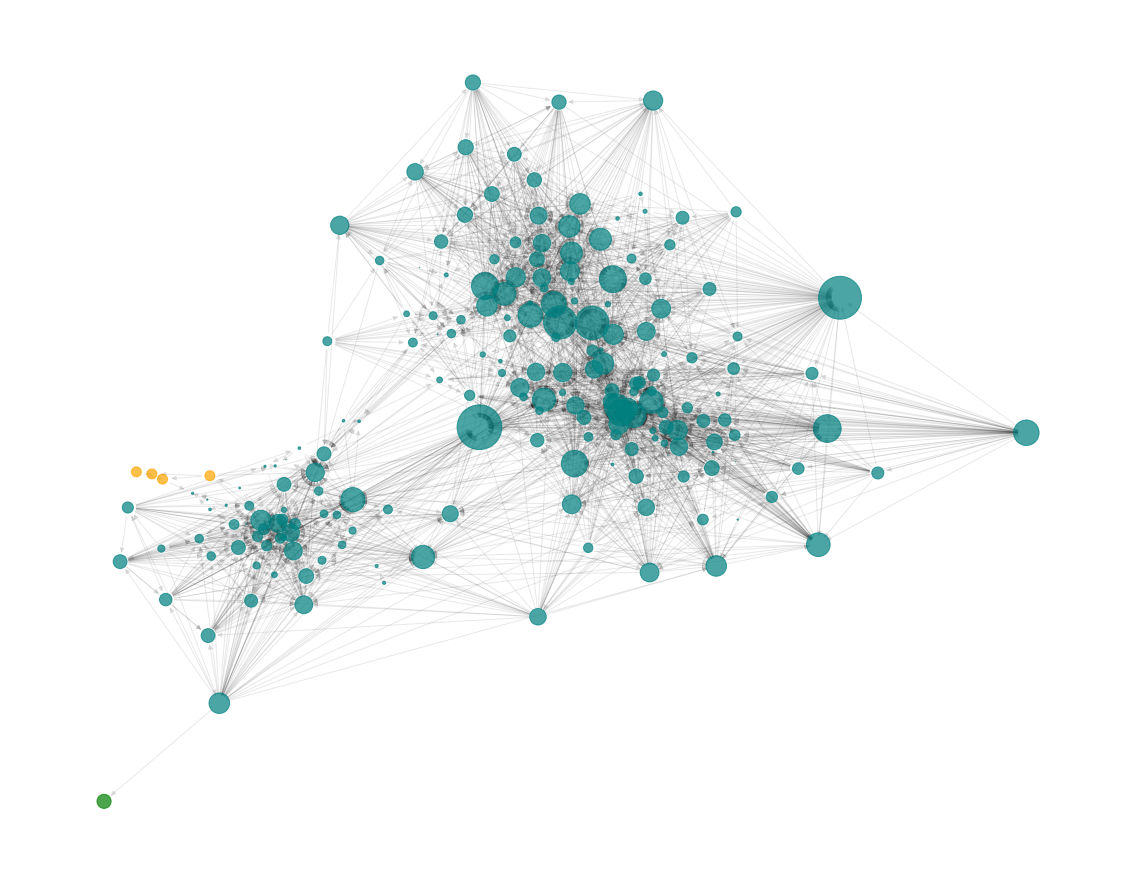

In [96]:
#cominities by .girvan_newman
plt.figure(figsize=(20,16))

degree = dict(jazz.degree)

size_node = [ degree[v]**2/5 if v in jazz_communities[0] else 100 if v in jazz_communities[1] else 200 for v in jazz]

color_node =  [cmap[1] if v in jazz_communities[0] else cmap[3] if v in jazz_communities[1] else cmap[4] for v in jazz]


positions = forceatlas2.forceatlas2_networkx_layout(jazz, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()

In [ ]:
#CLIQUES

In [99]:
def Cliques(G) :
    """
    Return a list of cliques the player belongs to
    """
    nx.find_cliques(G)
    cliques = []
    for i in G.nodes() :
        cliques.append(nx.cliques_containing_node(G, i))
    return cliques

In [104]:
#trasform to indirect graph
jazz_indirect = jazz.to_undirected()
cliques = Cliques(jazz_indirect)

In [145]:
cliques[2]



100%|██████████| 2000/2000 [00:02<00:00, 784.83it/s]


BarnesHut Approximation  took  0.87  seconds
Repulsion forces  took  1.19  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.15  seconds


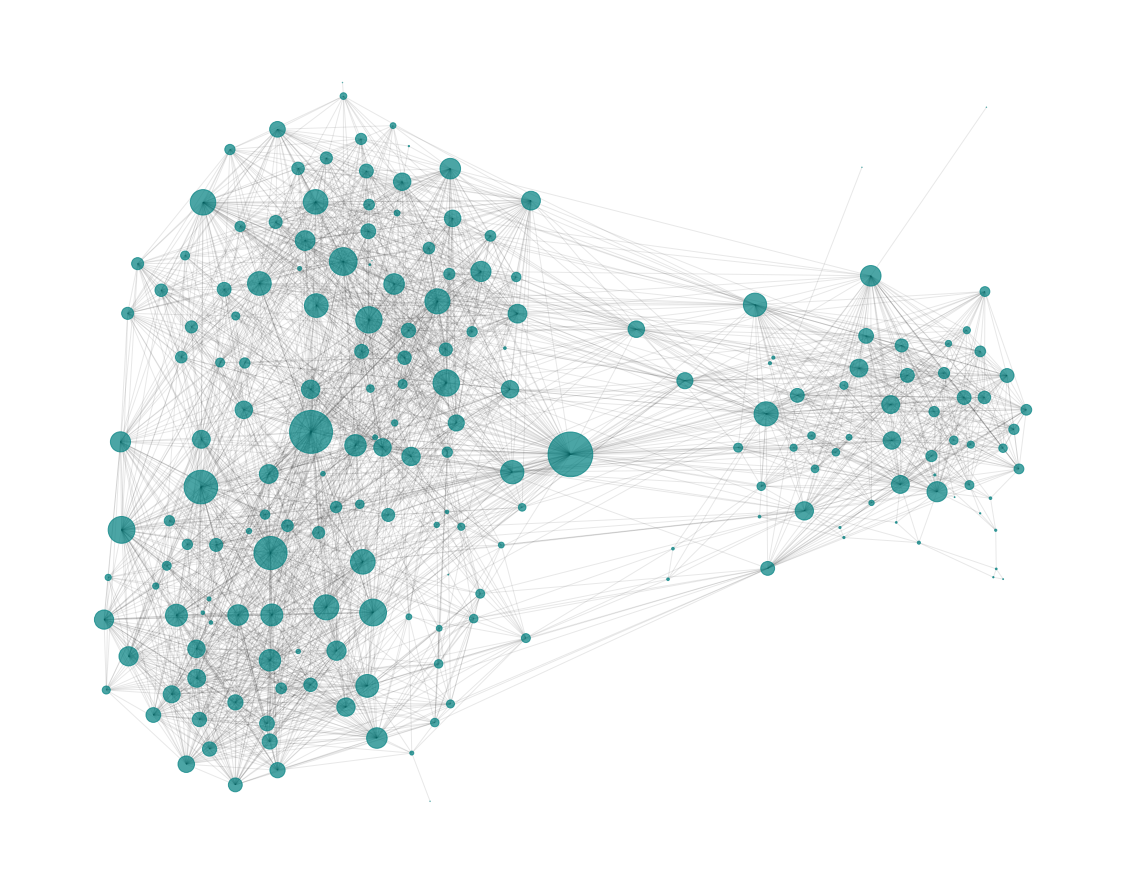

In [213]:
#indirect graph
plt.figure(figsize=(20,16))

degree = dict(jazz_indirect.degree)

size_node = [ degree[v]**2/5  for v in jazz_indirect.nodes ]

#color_node =  [cmap[2] if v in cliques[1] else cmap[3] if v in jazz_communities[1] else cmap[4] for v in jazz_indirect.nodes]


positions = forceatlas2.forceatlas2_networkx_layout(jazz_indirect, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz_indirect, positions, node_size=size_node, node_color='teal', alpha=0.7)
nx.draw_networkx_edges(jazz_indirect, positions, edge_color="black", alpha=0.09)
plt.axis('off')
plt.show()

In [180]:
cliques_jazz = list(nx.find_cliques(jazz_indirect))
cliques_jazz[6]


[1, 154, 35, 168, 171, 8, 98, 99, 131, 132, 100, 60, 101, 46, 95]

100%|██████████| 2000/2000 [00:02<00:00, 965.46it/s] 


BarnesHut Approximation  took  0.70  seconds
Repulsion forces  took  0.97  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.12  seconds
AdjustSpeedAndApplyForces step  took  0.13  seconds


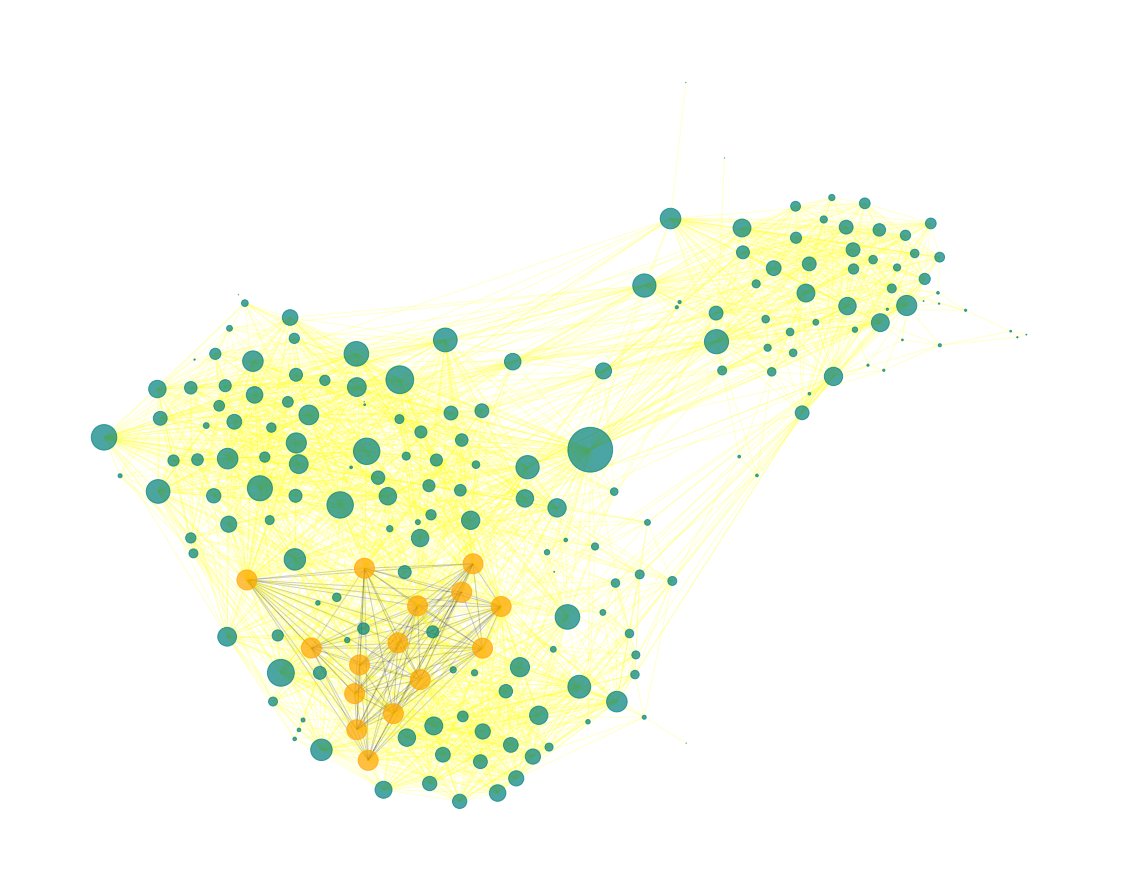

In [211]:
#superposition of max cliuqe into graph
#indirect graph
plt.figure(figsize=(20,16))

degree = dict(jazz_indirect.degree)
cliques_jazz = list(nx.find_cliques(jazz_indirect))


size_node = [ 400 if v in cliques[6] else degree[v]**2/5  for v in jazz_indirect.nodes ]

color_node = [cmap[3] if v in cliques_jazz[6] else cmap[1]  for v in jazz_indirect.nodes]

edge_color =  [cmap[2] if u in cliques[6] and v in cliques[6] else cmap[5] for (u,v) in jazz_indirect.edges]

positions = forceatlas2.forceatlas2_networkx_layout(jazz_indirect, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz_indirect, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz_indirect, positions, edge_color=edge_color, alpha=0.2)
plt.axis('off')
plt.show()

In [226]:
#superposition of max cliuqe into graph
#indirect graph


degree = dict(jazz_indirect.degree)
cliques_jazz = list(nx.find_cliques(jazz_indirect))

max_clique =[]
for i in cliques_jazz:
    if len(max_clique) < len(i):
        max_clique = i




100%|██████████| 2000/2000 [00:02<00:00, 798.12it/s] 


BarnesHut Approximation  took  0.87  seconds
Repulsion forces  took  1.14  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.16  seconds


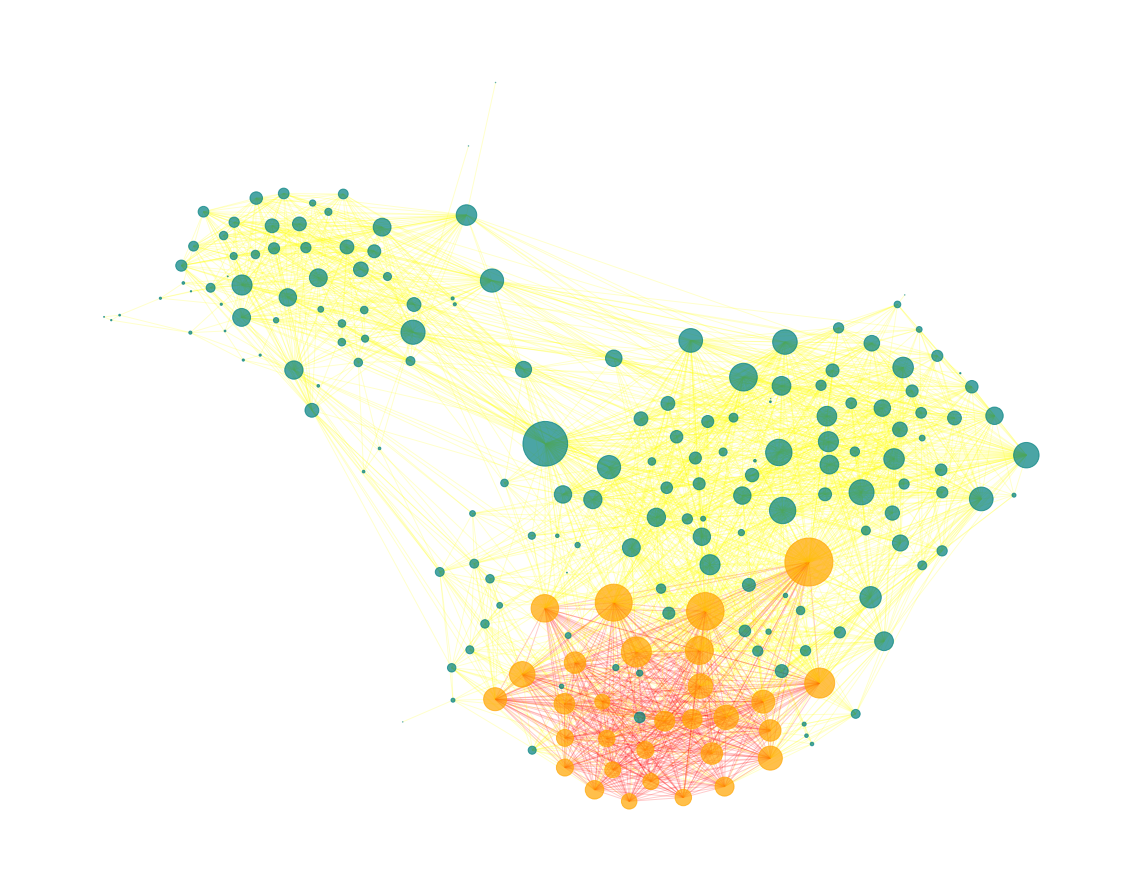

In [233]:
plt.figure(figsize=(20,16))

size_node = [ degree[v]**2/4 if v in max_clique else degree[v]**2/5  for v in jazz_indirect.nodes ]

color_node = [cmap[3] if v in max_clique else cmap[1]  for v in jazz_indirect.nodes]

edge_color =  [cmap[6] if u in max_clique and v in max_clique else cmap[5] for (u,v) in jazz_indirect.edges]

positions = forceatlas2.forceatlas2_networkx_layout(jazz_indirect, pos=None, iterations=2000)
nx.draw_networkx_nodes(jazz_indirect, positions, node_size=size_node, node_color=color_node, alpha=0.7)
nx.draw_networkx_edges(jazz_indirect, positions, edge_color=edge_color, alpha=0.2)
plt.axis('off')
plt.show()